<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/Assignment_07_20150711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data-kmeans.csv')
data = dataset.values
label = np.random.randint(5, size = (200,1))
data = np.append(data, label, axis = 1)

In [12]:
Z = data[:,:2]
c = data[:,-1]

compute_distance(data[data[:,2] == 2][:,:2],[2,2])

array([ 22.20360331,  21.09502311,  28.63564213,  84.11896338,
        76.32168761,  33.24154028,  84.86459804,  80.95677859,
        65.21502894,  71.02816343,  63.78087488,  66.48308055,
        70.83784299,  61.7170965 ,  68.76772499,  72.83543094,
        72.13875519,  75.69015788,  69.33974329,  75.2861209 ,
        72.11102551,  77.62087348,  76.02631123,  75.16648189,
        76.4852927 , 103.96634071,  78.58753082,  77.46612163,
       106.07544485,  86.40023148,  88.60022573, 104.6231332 ,
        85.70880935,  86.70063437,  86.97700846,  91.78779875,
       126.58988901, 103.16006979, 142.2743828 ])

In [34]:
def compute_distance(a,b):
  dist = np.sqrt(np.sum((a-b) ** 2, axis = 1))
  return dist

def compute_centroid(Z):
  center = []
  ca = center.append
  for i in range(5):
    tmp = Z[Z[:,2] == i][:, :2]
    ca(np.sum(tmp,axis = 0) / len(tmp))
  return np.array(center)

#z individual point
def compute_label(z,M):
  label = np.argmin(compute_distance(z,M))
  return label

#Data is a data and M is set of centroids
def compute_loss(Data,M):
  loss = 0
  length = len(Data)
  for i in range(5):
    loss += np.sum(compute_distance(Data[Data[:,2] == i][:,:2],M[i]) ** 2)
  return loss / length

In [35]:
center = compute_centroid(data)

array([[-2, -1],
       [-1,  0],
       [ 1,  2]])

# **[Output] Plot the data points**

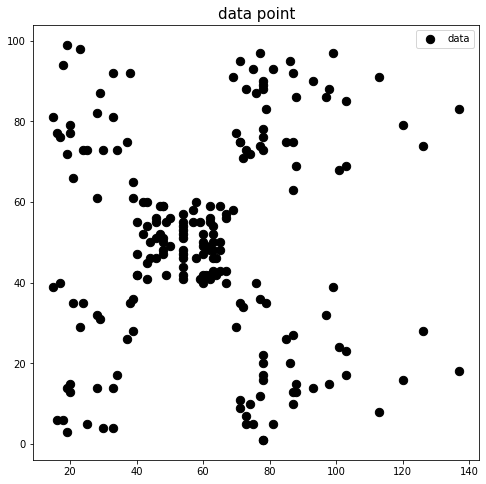

In [23]:
plt.figure(figsize = (8,8))
plt.scatter(data[:,0],data[:,1], c = "black", s = 70, label = "data")
plt.title("data point", fontsize = 15)
plt.legend(loc = "upper right")
plt.show()

# **[Output] Visualize the initial condition of the point labels**

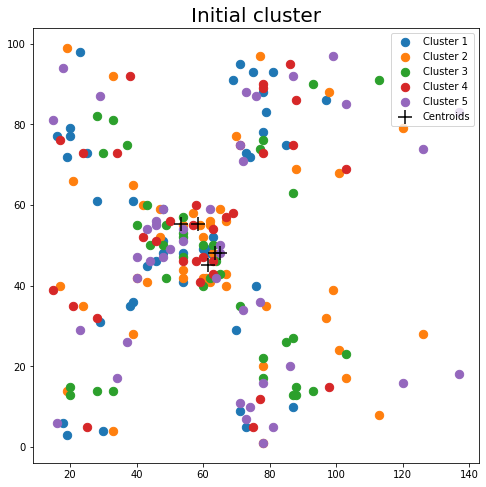

In [43]:
plt.figure(figsize = (8,8))
for i in range(5):
  tmp = data[data[:,2]==i][:, :2]
  plt.scatter(tmp[:,0],tmp[:,1], s = 70, label = "Cluster "+str(i+1))
plt.scatter(center[:,0],center[:,1],c = "black", marker = "+", s = 200, label = "Centroids")
plt.title("Initial cluster", fontsize = 20)
plt.legend(loc = "upper right")
plt.show()